<a href="https://colab.research.google.com/github/kevin0409/AI_schoolwork/blob/main/Decision_tree_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = load_breast_cancer(as_frame = True)

In [ ]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
data = dataset.frame

In [ ]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


31개의 columns : 마지막에 y 값에 해당하는 target 가지 포함

In [ ]:
data.shape

(569, 31)

In [ ]:
data['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

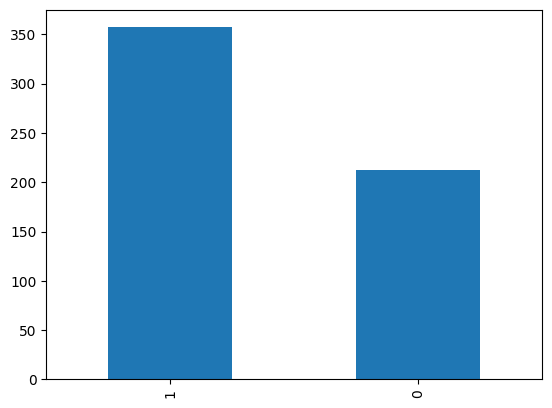

In [ ]:
data['target'].value_counts().plot.bar()
plt.show()

plot : pandas의 자체적 그래프 기능 // 
plt.show() 없어도 그래프는 출력할 수 있지만 jupyter notebook이 아니면 볼수 없음

In [ ]:
#split data

In [ ]:
count = int(data.shape[0]*.7)

튜플의 개수 * 0.7을 int형으로 반환

In [ ]:
train_data = data[:count] #data.shape[0]* 0.7이 실수면 안되니까 int 로 묶음
test_data = data[count:]

In [ ]:
train_x = train_data.drop(['target'], axis = 1)
train_y = train_data['target']

In [ ]:
train_x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,0.06606,...,26.23,28.74,172.00,2081.0,0.15020,0.5717,0.7053,0.24220,0.3828,0.10070
394,12.10,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.03326,0.1937,0.06161,...,13.56,25.80,88.33,559.5,0.14320,0.1773,0.1603,0.06266,0.3049,0.07081
395,14.06,17.18,89.75,609.1,0.08045,0.05361,0.02681,0.03251,0.1641,0.05764,...,14.92,25.34,96.42,684.5,0.10660,0.1231,0.0846,0.07911,0.2523,0.06609
396,13.51,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.05381,0.1806,0.06079,...,14.80,27.20,97.33,675.2,0.14280,0.2570,0.3438,0.14530,0.2666,0.07686


In [ ]:
train_y

0      0
1      0
2      0
3      0
4      0
      ..
393    0
394    1
395    1
396    1
397    1
Name: target, Length: 398, dtype: int64

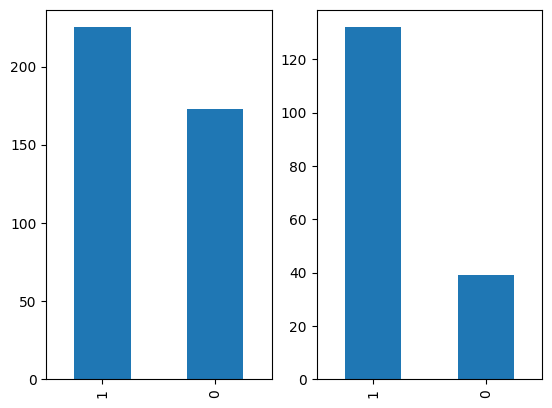

In [ ]:
plt.subplot(1,2,1)
train_data["target"].value_counts().plot.bar()
plt.subplot(1,2,2,)
test_data["target"].value_counts().plot.bar()
plt.show()

데이터 분포 비율이 차이가 큼

In [ ]:
train_data = data.sample(n = count, random_state = 20230412)
#train_data = data.sample(frac = .7)
train_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
252,19.730,19.82,130.70,1206.0,0.10620,0.18490,0.24170,0.097400,0.1733,0.06697,...,25.59,159.80,1933.0,0.1710,0.59550,0.84890,0.25070,0.2749,0.12970,0
67,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.022300,0.1516,0.05667,...,23.84,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641,1
313,11.540,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,0.1833,0.06100,...,12.87,81.23,467.8,0.1092,0.16260,0.08324,0.04715,0.3390,0.07434,1
87,19.020,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.082710,0.1953,0.05629,...,30.41,152.90,1623.0,0.1249,0.32060,0.57550,0.19560,0.3956,0.09288,0
322,12.860,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.034000,0.1543,0.06476,...,21.08,92.80,599.5,0.1547,0.22310,0.17910,0.11550,0.2382,0.08553,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,13.530,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.065560,0.2403,0.06641,...,12.49,91.36,605.5,0.1451,0.13790,0.08539,0.07407,0.2710,0.07191,1
114,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.019240,0.1649,0.07633,...,19.62,64.48,284.4,0.1724,0.23640,0.24560,0.10500,0.2926,0.10170,1
437,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.029440,0.1714,0.05898,...,21.58,101.20,750.0,0.1195,0.12520,0.11170,0.07453,0.2725,0.07234,1
527,12.340,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.026470,0.1689,0.05808,...,19.27,87.22,564.9,0.1292,0.20740,0.17910,0.10700,0.3110,0.07592,1


random_state : 랜덤시드값을 일정하게 유지

count = int(data.shape[0]*.7) // 
replace = True -> 복원추출

Use .sample : 데이터 셋을 랜덤으로 섞어서 추출(추출할때 마다 다르게 뽑힘)

In [ ]:
test_data = data.drop(train_data.index)
test_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902,0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440,0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.36820,0.26780,0.15560,0.3196,0.11510,0
10,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,33.88,123.80,1150.0,0.1181,0.15510,0.14590,0.09975,0.2948,0.08452,0
11,15.780,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,0.06082,...,27.28,136.50,1299.0,0.1396,0.56090,0.39650,0.18100,0.3792,0.10480,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,...,28.26,77.80,436.6,0.1087,0.17820,0.15640,0.06413,0.3169,0.08032,1
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,...,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.1298,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.1241,0.22640,0.13260,0.10480,0.2250,0.08321,1


전체 데이터 data에서 train_data에 있는 특정 행만을 제거하여 test_data 구성

In [ ]:
train_x = train_data.drop(["target"], axis = 1)
train_y = train_data["target"]
test_x = test_data.drop(["target"], axis = 1)
test_y = test_data["target"]

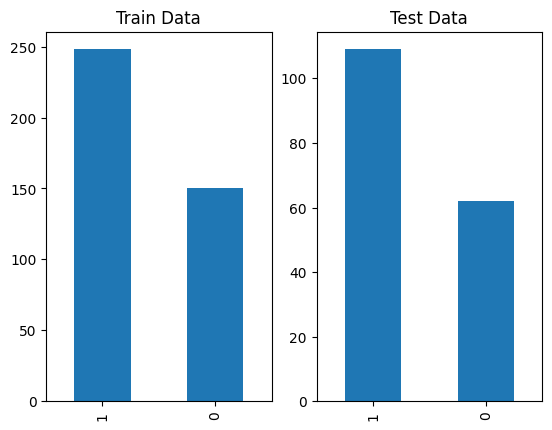

In [ ]:
plt.subplot(1,2,1)
train_data["target"].value_counts().plot.bar()
plt.title("Train Data")
plt.subplot(1,2,2,)
test_data["target"].value_counts().plot.bar()
plt.title("Test Data")
plt.show()

분포가 비슷해짐

In [ ]:
#train_test_split 라이브러리 사용 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(data, test_size = .3, stratify = data["target"], random_state = 20230412) 

test_size : 디폴트 0.25

stratify : target의 비율에 맞춰 데이터 분할

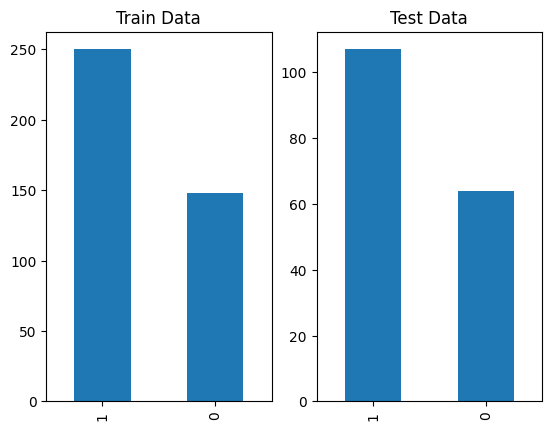

In [ ]:
plt.subplot(1,2,1)
train_data["target"].value_counts().plot.bar()
plt.title("Train Data")
plt.subplot(1,2,2)
test_data["target"].value_counts().plot.bar()
plt.title("Test Data")
plt.show()

완벽하게 비율이 맞춰짐

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data.drop(["target"], axis = 1), data["target"],test_size = .3, stratify = data["target"], random_state = 20230412)

한번에 분할

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT

Modeling

In [ ]:
decision_tree = DT(max_depth = 3)

max_depth : 최대 깊이 설정

In [ ]:
decision_tree.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred_y = decision_tree.predict(test_x)

In [ ]:
pred_y

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

Predict

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

In [ ]:
print(confusion_matrix(y_true = test_y, y_pred = pred_y))

[[ 52  12]
 [  1 106]]


\ -> 맞게 예측
/ -> 틀리게 예측

In [ ]:
print(accuracy_score(y_true = test_y, y_pred = pred_y))

0.9239766081871345


In [ ]:
print(precision_score(y_true = test_y, y_pred = pred_y))

0.8983050847457628


정밀도

In [ ]:
print(f1_score(y_true = test_y, y_pred = pred_y))

0.9422222222222222


recall과 precision의 평균

In [ ]:
print(classification_report(y_true = test_y, y_pred = pred_y))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89        64
           1       0.90      0.99      0.94       107

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171



recall : 재현율